For the past 2 tutorials we have evaded the question on how to actually writte a vaild mechanism in ElectroKitty. This will be remedied in this notebook. 

By now we should have a rough understanding how to declare our simulation parameters and how to excecute it. A demonstration on how to correctly (and incorrectly) writte out the simulation lists will be given, but we will skip some of the details, as it is assumed that you are fammiliar with the units, structure of the lists,...

Again let us start off by importing some libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from electrokitty import ElectroKitty

# General rules

Now that we have imported the libraries we need let us begin by discussing how the mechanism string is constructed in electrokitty. In the previous two tutorials, we have somewhat handwaved the details away. Well it is high time we discussed those. 

There are a few general rules that we need to keep in mind when writing the mechanism. 

First is that electrokitty ignores all spaces in the string, so using spaces is purely aesthetical and will not influence the parser in any meaningful way. 

Second, we must always declare a chemical reaction as either electrochemical or chemical, there is no default that electrokitty falls back on.

Third, for the species names, we can write practically anything we want, except for a few characters. (These are \n, =, <, >, :, but we will elaborate on this a bit further below).

Fourth, the reaction order is cathodic, meaning the left most species is the most oxidized and is reduced when going right.

Fifth, a "*" at the end of a species name denotes it as adsorbed.

Below a cheat sheet for the mechanism declaration is listed.

"E(n):" $->$ Reaction declared as electrochemical with n electrons passing

"C:" $->$ Reaction declared as chemical

"\n" $->$ Separateor between 2 reactions

"*" $->$ At the end of a species name, means that the species is adsorbed

"=" $->$ Reversible reaction, goes both ways

"<" $->$ Irreversible reaction, goes to the left

">" $->$ Irreversible reaction, goes to the right

"+" $->$ Addition of species


# Simple examples

With this let us start with a pretty basic example: the EC reaction. Here we will have a reduced electrochemically into b and then b will be converted chemically into c. 
Immediately, we notice that we will need two reactions, one declared with E(1): and one declared as C:. Both reactions will be reversible, so we will separate the species in the reaction with an = sign. 

In [2]:
mechanism = "E(1): a = b \n C: b = c"

The constants lists look something like this:

In [3]:
kinetic_constants = [[0.5, 10, 0.0], # Notice that now we declare a list containing two lists. 
                    [10,1]] # The second list needs the forward and backward rate constant. Here in units of [1/s] 

# We also declare 3 diffusion coefficients in the oreder of a, b, c, as that is how they appear in the mechanism
Diffusion_constants=[10**-9, 10**-9, 10**-9] 

initial_condition = [[], [1, 0, 0]] # Same logic for the initial conditions

spatial_information = [0.001, 20, 10**-5, 0] 

cell_constants = [293, 0, 0, 0.283*10**-4] 

iso = [] 

Defining the simulation potential window and making some class calls...

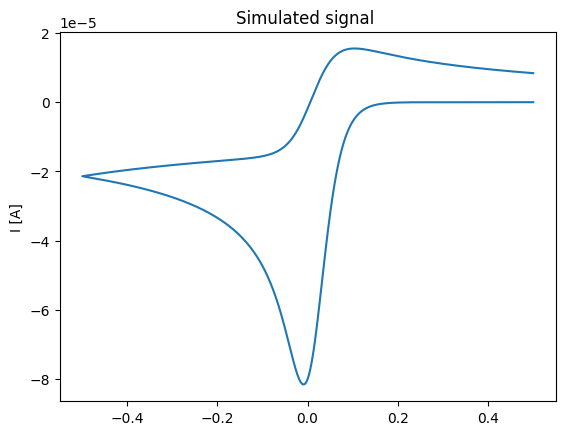

In [4]:
Ei = 0.5 
E_switch = -0.5 
scan_rate = 0.1 
nt = 1000 

simulation = ElectroKitty(mechanism)
simulation.V_potencial(Ei, E_switch, scan_rate, 0, 0, nt)
simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition)
simulation.simulate()
simulation.Plot_simulation()

The reason that the anodic peak looks like that is found in the concentration profile...

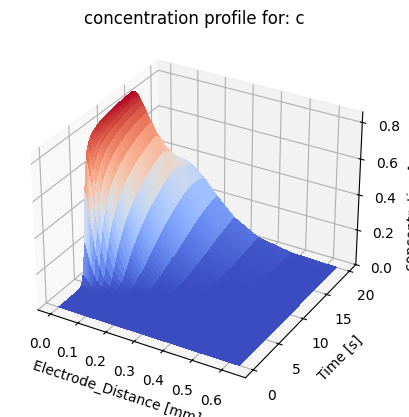

In [5]:
simulation.Plot_concentration_profile(species_num = 2)

Next up let's play around a bit and see what happens if we declare the second reaction as second order or even third. Electrokitty does not recognize numbers in the mechanism string as being of any special importance. To get around this we will use the + sign in when writing the reaction. This will tell electrokitty that we need two or three b for it to be converted into c.

Note: the + sign essentially tells the simulator that it should multiply the species separated by it when calculating kinetics. It is thus possible to have a reaction order of any integer. Why someone would need this, is up to them to decide.

The string looks something like this...

In [6]:
mechanism = "E(1): a = b \n C: b + b = c"

The simulation lists are virtually the same as before, however the units for the forward step in the C reaction have now changed from [1/s] to [m^3/mols]. The difference is seen when examining the current and concentration profile.

Note: for electrokitty the units for the reaction constant matter very little and there is no internal check. As such when reporting the constants one should take extra care to report them correctly! 

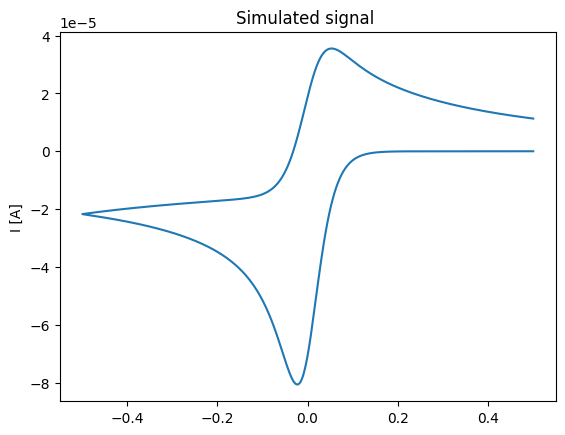

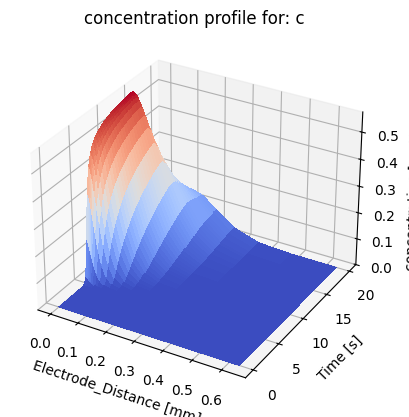

In [7]:
kinetic_constants = [[0.5, 10, 0.0], 
                    [5,1]] # Note here that the constant 5 has now the units of [m^3/mols]


Diffusion_constants=[10**-9, 10**-9, 10**-9] 

initial_condition = [[], [1, 0, 0]] 

spatial_information = [0.001, 20, 10**-5, 0] 

cell_constants = [293, 0, 0, 0.283*10**-4] 

iso = [] 

Ei = 0.5 
E_switch = -0.5 
scan_rate = 0.1 
nt = 1000 

simulation = ElectroKitty(mechanism)
simulation.V_potencial(Ei, E_switch, scan_rate, 0, 0, nt)
simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition)
simulation.simulate()
simulation.Plot_simulation()
simulation.Plot_concentration_profile(species_num = 2)

For the third order reaction we writte the code as such:

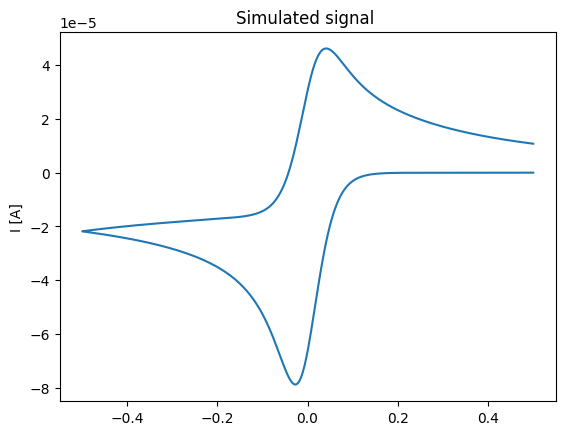

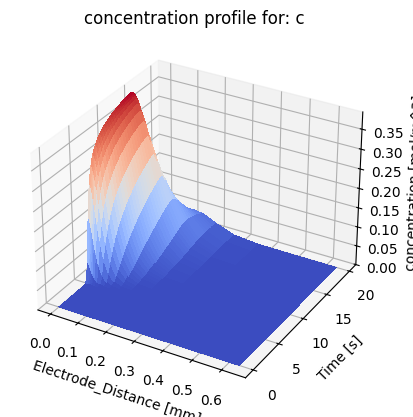

In [8]:
mechanism = "E(1): a = b \n C: b + b + b = c"

kinetic_constants = [[0.5, 10, 0.0], 
                    [3, 1]] # Note here that the constant 3 has now the units of [m^6/mol^2s]


Diffusion_constants=[10**-9, 10**-9, 10**-9] 

initial_condition = [[], [1, 0, 0]] 

spatial_information = [0.001, 20, 10**-5, 0] 

cell_constants = [293, 0, 0, 0.283*10**-4] 

iso = [] 

Ei = 0.5 
E_switch = -0.5 
scan_rate = 0.1 
nt = 1000 

simulation = ElectroKitty(mechanism)
simulation.V_potencial(Ei, E_switch, scan_rate, 0, 0, nt)
simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition)
simulation.simulate()
simulation.Plot_simulation()
simulation.Plot_concentration_profile(species_num = 2)

Electrokitty also allows us to mix together adsorbed and dissolved species when writing the mechanism string. Say that again we are reducing a to b. Now on the surface we have some species c* that reacts with b and gives us back a. However c* is converted to d*. This reaction however is chemically irreversible.

The string looks something like this.

In [9]:
mechanism = "E(1): a = b \n C: c* + b > d* + a"

Notice that we have used > to declare the reaction as irreversible. This means that we will need only 1 constant to describe the reaction.

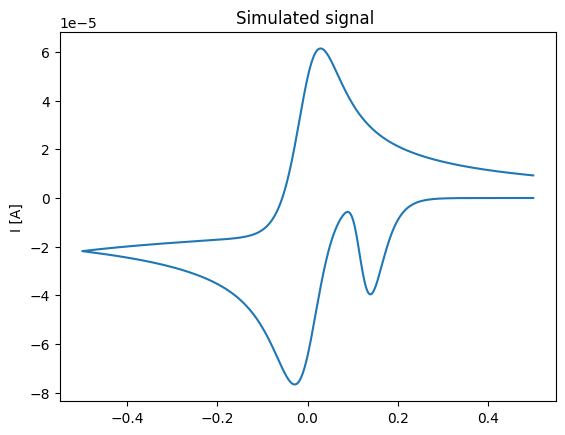

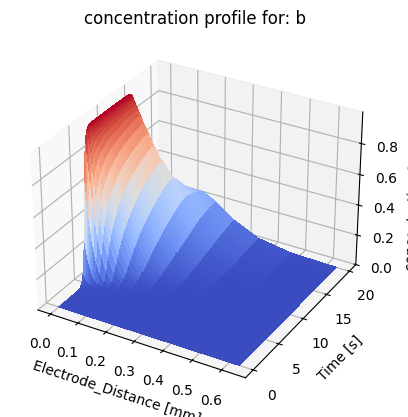

In [10]:
kinetic_constants = [[0.5, 10, 0.0], 
                    [1000]] # Note that it is a list containing only 1 element


Diffusion_constants=[10**-9, 10**-9] # only 2 species now

initial_condition = [[10**-5 , 0], [1, 0]] # See that for the initial condition we now have filled both lists

spatial_information = [0.001, 20, 10**-5, 0] 

cell_constants = [293, 0, 0, 0.283*10**-4] 

iso = [0, 0] # No nonidealities present 

Ei = 0.5 
E_switch = -0.5 
scan_rate = 0.1 
nt = 1000 

simulation = ElectroKitty(mechanism)
simulation.V_potencial(Ei, E_switch, scan_rate, 0, 0, nt)
simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition)
simulation.simulate()
simulation.Plot_simulation()
simulation.Plot_concentration_profile(species_num = 1)

Intersting that another peak has occured, let us see the surface concentrations to figure out what is going on...

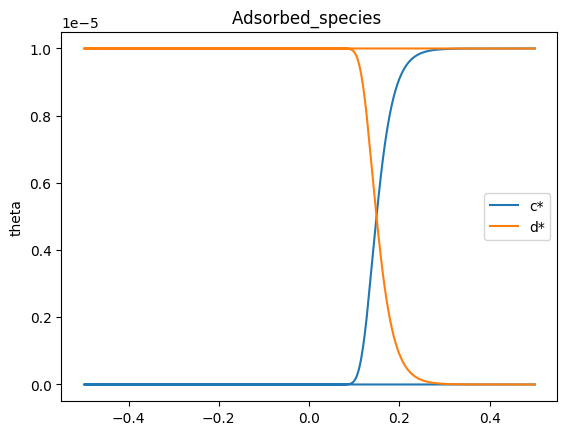

In [11]:
simulation.Plot_Adsorbed_species()

It seems that the species can only turn b back to a definite amount and this then results in an additional peak forming...

# Advanced example

Having warmed up a bit let us now try a complex example. Until now we have focused exclusively on reducing our initially present species, now we demonstrate how we can simulate the reverse, while demonstrating a more complex example. 

To make this example more relevant, let us imagine that we start off with a pure metal surface, which we will then anodically oxidize. Let us assume that the metal oxidizes by first electrochemically adsorbing OH on its surface. The newly formed species then dissolves, where it again electrochemically reacts with OH in solution. The double OH species then adsorbs on the surface, where it finally oxidizes to form a metal O species. 

There is a lot to take in here so let us take it step by step. (We will denote the metal with m.)
The mechanism must be written in the cathodic order, so we start off by writing the final reaction in our description: "C: mO* < mOH2*" We assume irreversibility. 

Next, we need to put down that mOH2 adsorbs back onto the surface, something like this should be good, assuming reversibility: "C: mOH2* = * + mOH2". We assume here that * is an empty site in the surface. In the current context, it was occupied with m at the beginning but we will get there.

The first electrochemical reaction should be given as mOH2 reducing back to mOH in solution. The correct declaration is this: "C:mOH2 =  mOH_pos + OH \n E(1): mOH_pos = mOH". We declare this as two reactions, first OH reacting with the metal complex, and the second beeing the oxidation of the metal complex from +1 to +2.

Followed by mOH desorption: "C: mOH + * = mOH*". We see that when mOH desorbs it releases an active site, where mOH2 can adsorb onto.

Finally, we must write out how the metal initially adsorbs on OH. We will cheat a little bit and write as such: "E(1): mOH* = OH + m*". To be more formally correct we should split this reaction into 2 steps, as the units of our constants will make little sense, however for the sake of the tutorial, let us leave it be.

Taking all the steps together the mechanism is written out in full like so:


In [19]:
mechanism = "C: mO* < mOH2* \n C: mOH2* = * + mOH2 \n C:mOH2 = mOH_pos + OH \n E(1): mOH_pos = mOH \n C: mOH + * = mOH* \n E(1): mOH* = OH + m*"

With the mechanism written out in full let us now focus on setting up our constants. In terms of electrokitty we now have a CCCECE mechanism. With some of the C's being adsorption. As is usual we start off by writting our kinetic constants...

In [20]:
kinetic_constants = [
    [0.01], # The proccess is irreversible so only 1 is needed
    [1, 10], # Now the 10 is associated with the mOH2 adsorbing as per the mechanism 
    [1, 1],
    [0.5, 10, 0.25], # As we are writing in the cathodic order, it would make sense for this reaction to have a slightly higher E0
    [10, 1], # Perhaps it is more difficult to desorb this species
    [0.5, 0.01, -0.2] # This reaction is a bit slower...
]

Next we need to set up our initial condition, as well as some other parameters. Since we will be oxidizing our metal, all we need to do is set it up so that we start with some concentration of m*, with all the other concentrations being 0, with OH the exception, it will be set to 100 (0.1 M). 

To create our initial condition and other lists we must correctly determine the order of appearance of our species in the mechanism string. We can do this by carefully noting each species. This is a tedious process, so we will use a trick that will help us quite a lot. When we call the create_simulation function, part of that call is parsing the mechanism, by a separate class. This class creates all the necessary lists for the simulation, the details of their construction are largely irrelevant, except for one. This list contains all the species in the mechanism sorted in the way we want. So let us call some favours...

In [21]:
simulation = ElectroKitty(mechanism)
simulation.Parser.Parse_mechanism()[0]

[['mO*', 'mOH2*', '*', 'mOH*', 'm*'], ['mOH2', 'mOH_pos', 'OH', 'mOH']]

The first list contains our adsorbed species, while the second contains the dissolved species. Writing the lists is now simple. As discussed for oxidation, we now start off with m* having a non-zero initial condition, and we have 0.1M OH initially present.

In [22]:
                    #  'mOH2', 'mOH_pos', 'OH', 'mOH'
Diffusion_constants=[10**-9, 10**-9, 10**-9, 10**-9]

                    # 'mO*', 'mOH2*', '*', 'mOH*', 'm*'    'mOH2', 'mOH_pos', 'OH', 'mOH'
initial_condition = [[0, 0, 0, 0, 10**-5], [0, 0, 100, 0]] 

spatial_information = [0.001, 20, 10**-5, 0]

cell_constants = [293, 0, 0, 0.283*10**-4] 

# 'mO*', 'mOH2*', '*', 'mOH*', 'm*'
iso = [0, 0, 0, 0, 0]  # we will leave these at 0, the example is already very complex

Now we just need to input the correct simulation program, now starting at -0.7 V and going to 0.7 V. 
We input that and run thing as before, checking the adsorbed species profile that everything ran smoothly.

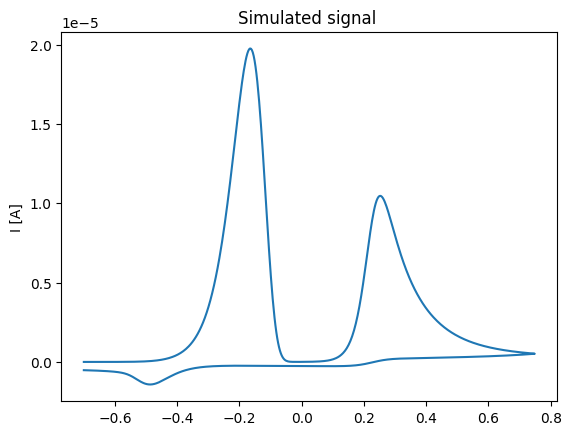

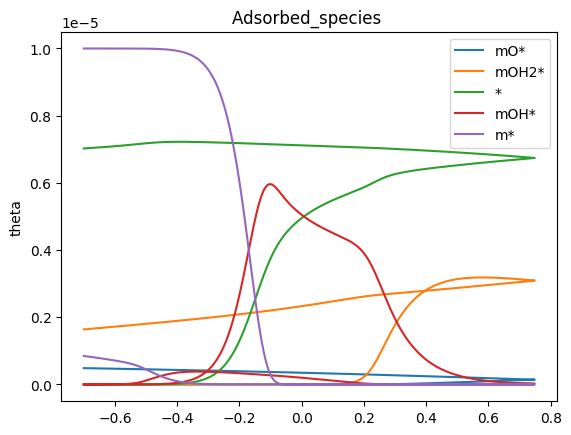

In [23]:
Ei = -0.7
E_switch = 0.75 
scan_rate = 0.1 
nt = 1000 

simulation = ElectroKitty(mechanism)
simulation.V_potencial(Ei, E_switch, scan_rate, 0, 0, nt)
simulation.create_simulation(kinetic_constants, cell_constants, Diffusion_constants, iso, spatial_information,initial_condition)
simulation.simulate()
simulation.Plot_simulation()
simulation.Plot_Adsorbed_species()

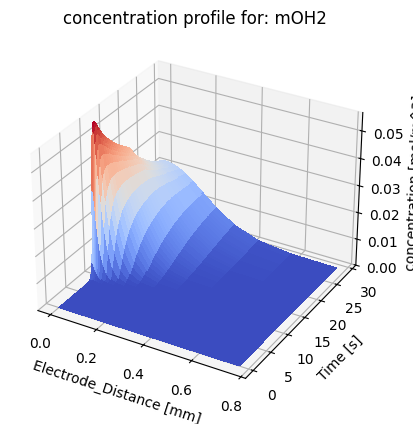

In [24]:
simulation.Plot_concentration_profile(species_num = 0)

# 'mOH2', 'mOH_pos', 'OH', 'mOH'
# 0        1         2      3   If you would like to check   

By following this tutorial you should be comfortable with writing your own mechanism and simulating it.

In the next tutorial, we will deal with data, how do we import it, plot it, correct it for IR, how to perform harmonic analysis and some details about how to save and load our progress with electrokitty. 